In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

In [ ]:
%store -r acc_fc_era_box
%store -r acc_fc_ec_box
%store -r acc_ec_box
%store -r acc_ec_cf_box

%store -r acc_fc_ec_cf_box
%store -r acc_fc_ec_cf_box_big
%store -r acc_fc_ec_cf_box_whole

%store -r acc_fc_era_box_big
%store -r acc_fc_era_box_whole
%store -r acc_fc_era_box


%store -r acc_ec_box
%store -r acc_ec_box_big
%store -r acc_ec_box_whole

%store -r acc_fc_ec_box
%store -r acc_fc_ec_box_big
%store -r acc_fc_ec_box_whole

%store -r acc_ec_cf_box_big
%store -r acc_ec_cf_box_whole

In [9]:
np.shape(acc_fc_era_box_big)

(15, 51)

([<matplotlib.axis.XTick at 0x153d2c902a60>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

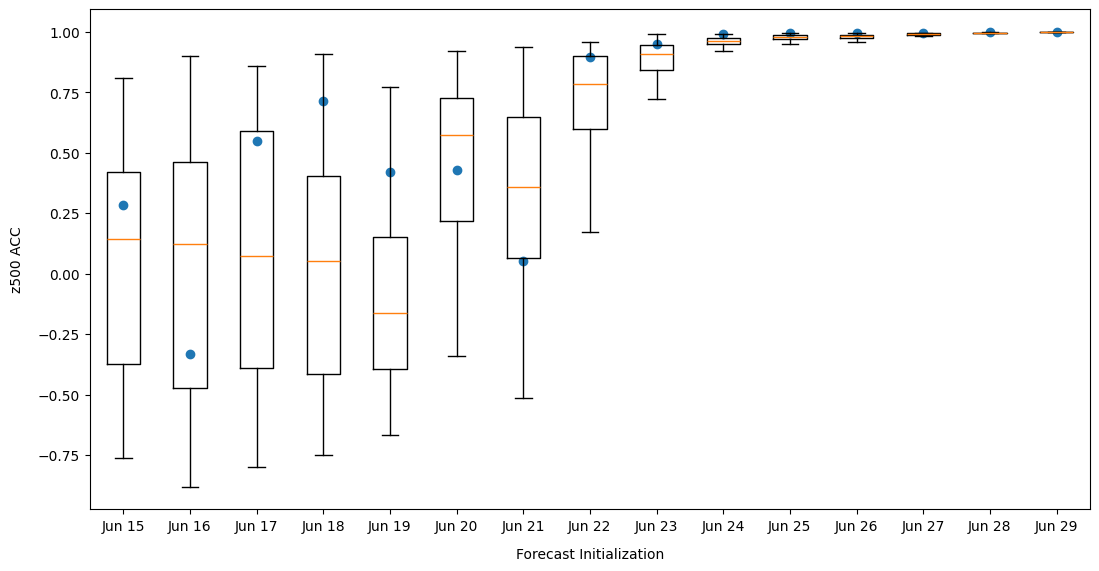

In [10]:
#ACC boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=acc_ec_box.T
ax.boxplot(data,showfliers = False)
ax.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],acc_ec_cf_box)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [11]:
acc_fc_era_cf_box_big = acc_fc_era_box_big[:,0]
acc_fc_era_cf_box_whole = acc_fc_era_box_whole[:,0]
acc_fc_era_cf_box = acc_fc_era_box_whole[:,0]

-1.0
0.0
1.0


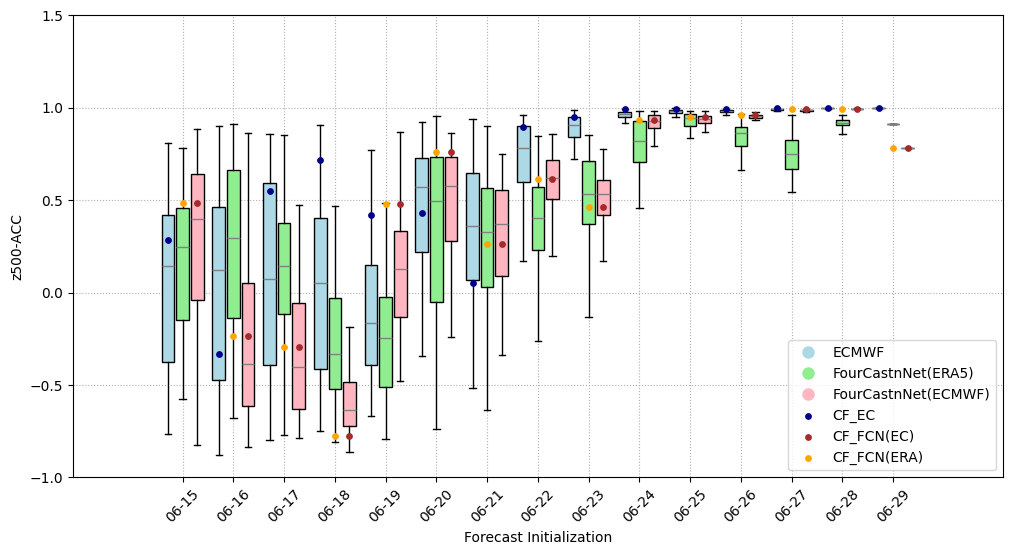

In [12]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box.T,acc_fc_era_box.T,acc_fc_ec_box.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width





xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])



data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False,zorder=2
                )

#%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )
point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_cf_box,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_cf_box,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_ec_cf_box,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)

legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)','CF_EC','CF_FCN(ERA)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
#plt.title('whole area')
plt.savefig('/home/kit/imk-tro/gj5173/13.10-plots/z500_ACC_box.png', bbox_inches='tight',dpi=100)

pl.show()

-1.0
0.0
1.0


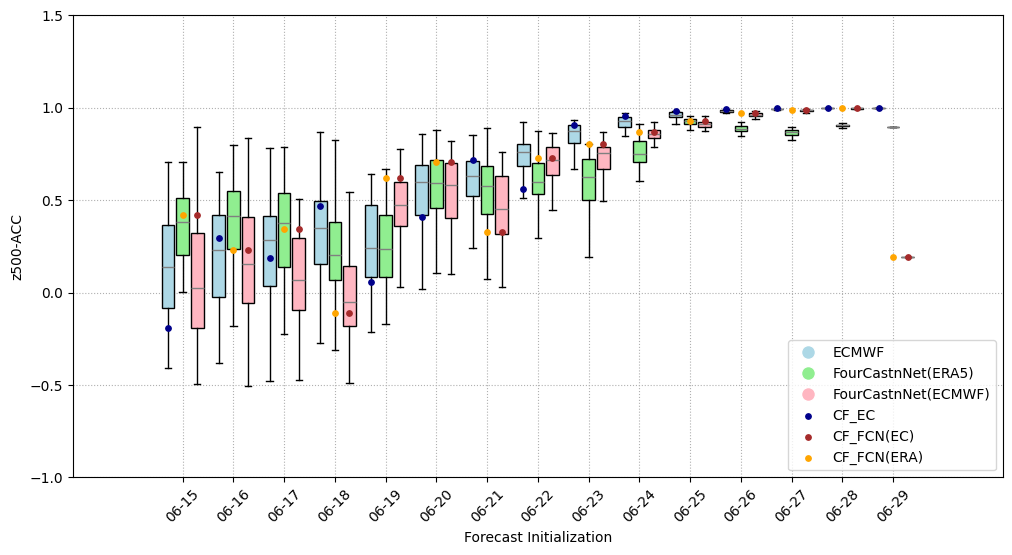

In [13]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_big.T,acc_fc_era_box_big.T,acc_fc_ec_box_big.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )

point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_cf_box_big,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_cf_box_big,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_ec_cf_box_big,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)

legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
#plt.title('whole area')
plt.savefig('/home/kit/imk-tro/gj5173/13.10-plots/z500_ACC_box_larger.png', bbox_inches='tight',dpi=100)

pl.show()

-1.0
0.0
1.0


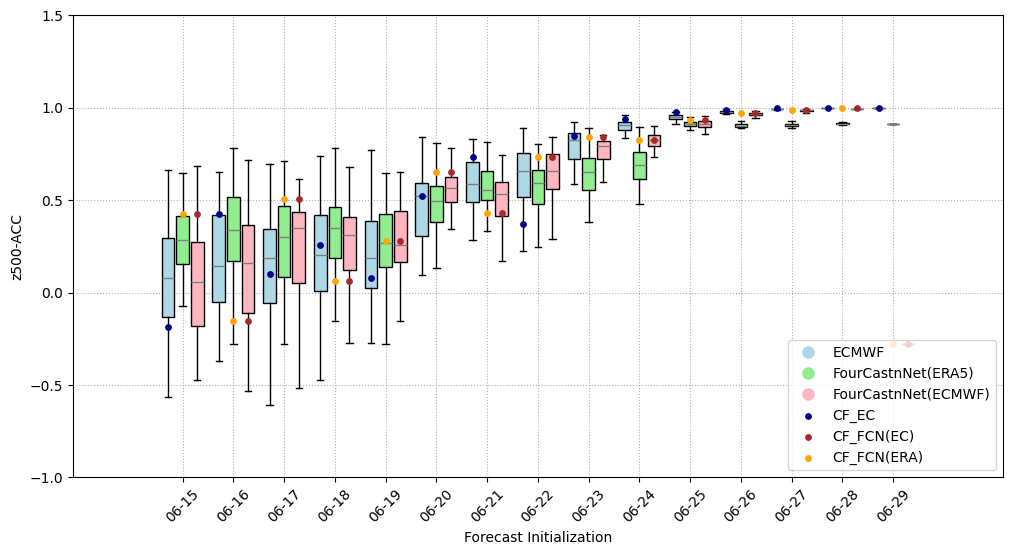

In [14]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_whole.T,acc_fc_era_box_whole.T,acc_fc_ec_box_whole.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_cf_box_whole,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_cf_box_whole,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_ec_cf_box_whole,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)





for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
#plt.title('whole area')
plt.savefig('/home/kit/imk-tro/gj5173/13.10-plots/z500_ACC_box_whole.png', bbox_inches='tight',dpi=100)

pl.show()